<a href="https://colab.research.google.com/github/jomscan/CEIABDTA/blob/main/Modelo_VGG16_Butterfly_Image_Calssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VGG16 v3

In [1]:
#Importacion de librerias necesarias

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np



In [2]:
# Montar Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Definir ruta de la carpeta principal de tu proyecto en Drive

project_path = '/content/drive/MyDrive/dataset_Mariposa/'

# Definir rutas para CSV y carpetas de imágenes

train_csv_path = os.path.join(project_path, 'Training_set.csv')
test_csv_path = os.path.join(project_path, 'Testing_set.csv')
image_dir = os.path.join(project_path, 'train')
test_dir = os.path.join(project_path, 'test')

# Cargar los CSV

df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)

<ipython-input-6-545092d000d4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='plasma')


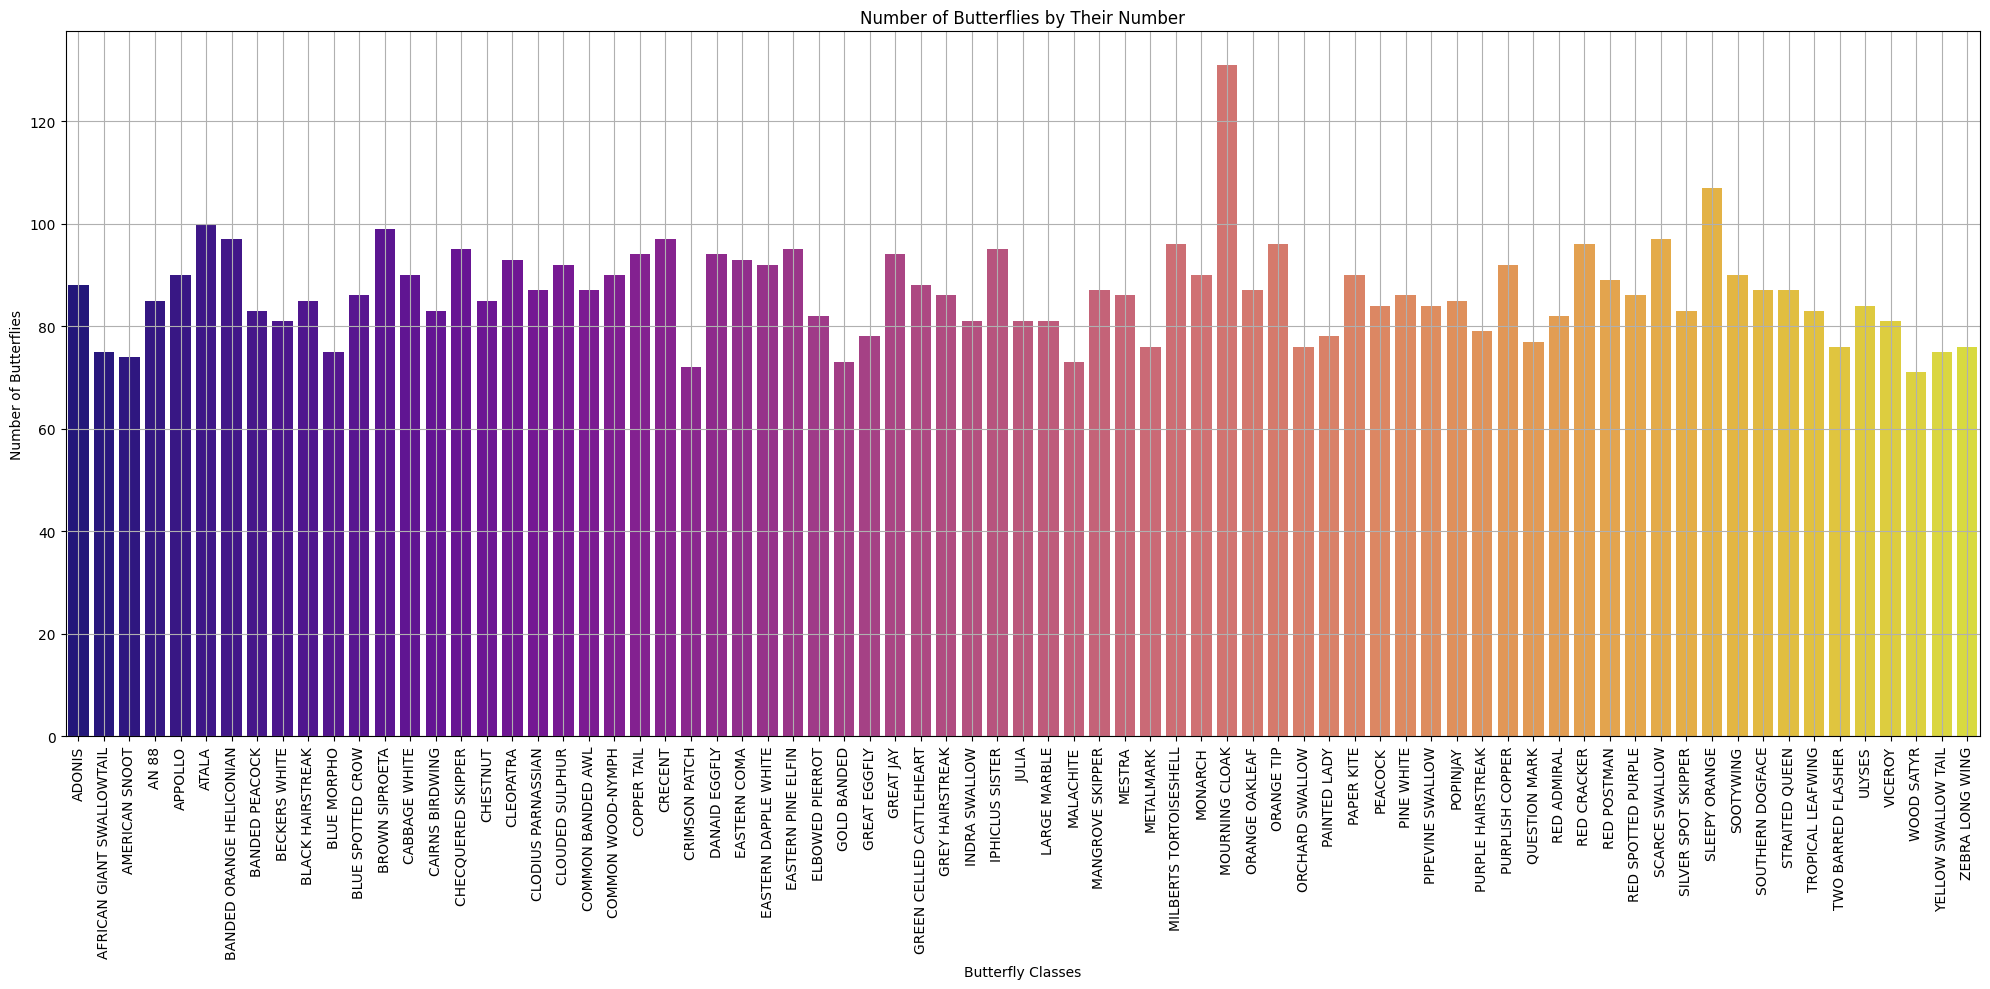

In [6]:
import seaborn as sns

# Visualización de la distribución de clases para saber si esta desbalanceado

class_counts = df_train['label'].value_counts().sort_index()
fig1 = plt.figure(figsize=(20, 10))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='plasma')
plt.title('Number of Butterflies by Their Number')
plt.xlabel('Butterfly Classes')
plt.ylabel('Number of Butterflies')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

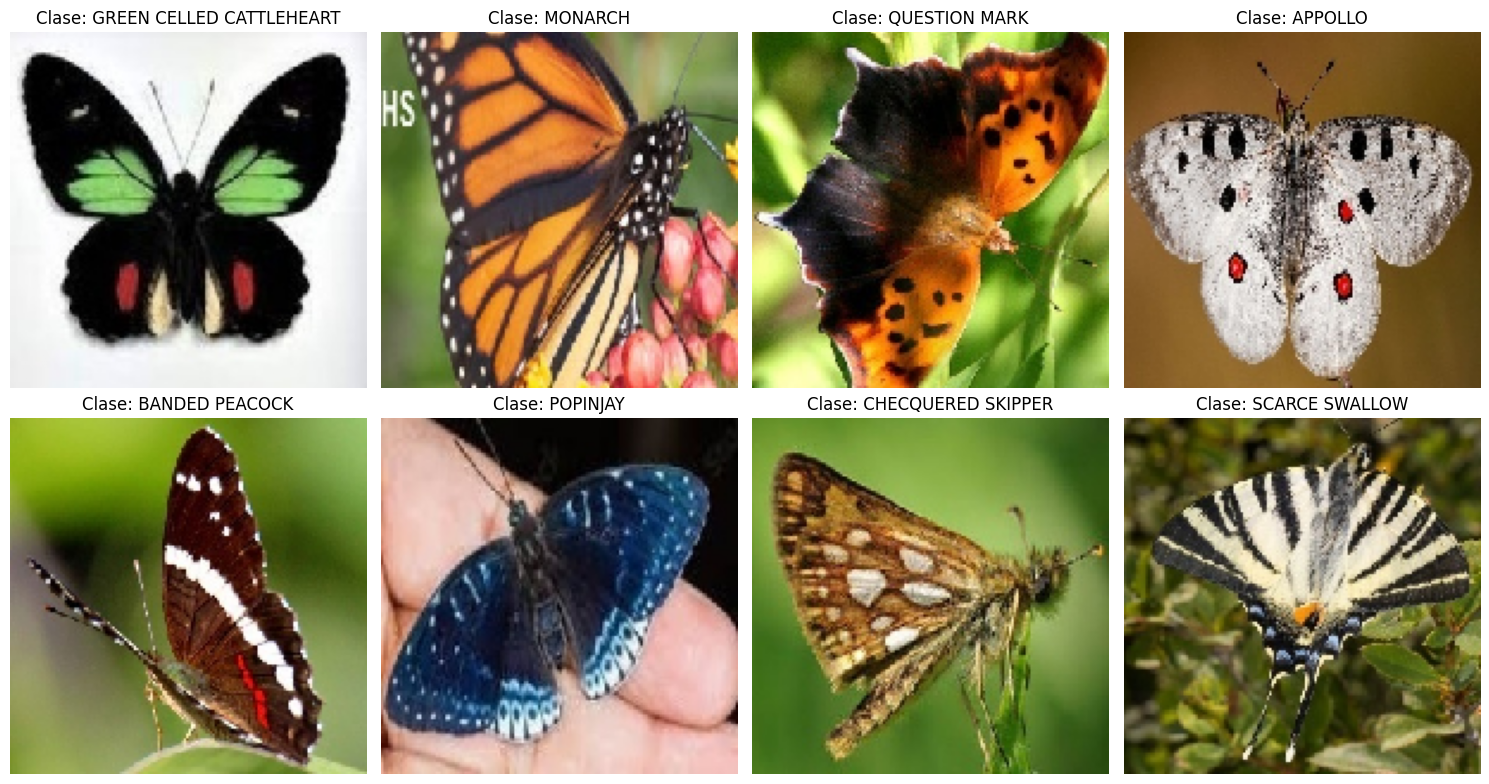

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array # Importa las funciones necesarias


#Pequeña representacion Visual de las especies con sus fotos

# Crear una cuadrícula para mostrar las mariposas
fig4, axes = plt.subplots(2, 4, figsize=(15, 8))

# Muestra aleatoria
sample_images = df_train.sample(8, random_state=42)

# Mostrar imágenes
for i, (index, row) in enumerate(sample_images.iterrows()):
    image_path = os.path.join(image_dir, row['filename'])
    image = load_img(image_path, target_size=(150, 150))
    image_array = img_to_array(image) / 255.0  # Para normalización
    ax = axes[i // 4, i % 4]

    ax.imshow(image_array)
    ax.set_title(f"Clase: {row['label']}")
    ax.axis('off')  # Ocultar ejes

# Mostrar las imágenes
plt.tight_layout()
plt.show()


In [11]:
# Divide los datos de entrenamiento en train y validación

train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

Found 5199 validated image filenames belonging to 75 classes.
Mapping de clases (nombre: índice): {'ADONIS': 0, 'AFRICAN GIANT SWALLOWTAIL': 1, 'AMERICAN SNOOT': 2, 'AN 88': 3, 'APPOLLO': 4, 'ATALA': 5, 'BANDED ORANGE HELICONIAN': 6, 'BANDED PEACOCK': 7, 'BECKERS WHITE': 8, 'BLACK HAIRSTREAK': 9, 'BLUE MORPHO': 10, 'BLUE SPOTTED CROW': 11, 'BROWN SIPROETA': 12, 'CABBAGE WHITE': 13, 'CAIRNS BIRDWING': 14, 'CHECQUERED SKIPPER': 15, 'CHESTNUT': 16, 'CLEOPATRA': 17, 'CLODIUS PARNASSIAN': 18, 'CLOUDED SULPHUR': 19, 'COMMON BANDED AWL': 20, 'COMMON WOOD-NYMPH': 21, 'COPPER TAIL': 22, 'CRECENT': 23, 'CRIMSON PATCH': 24, 'DANAID EGGFLY': 25, 'EASTERN COMA': 26, 'EASTERN DAPPLE WHITE': 27, 'EASTERN PINE ELFIN': 28, 'ELBOWED PIERROT': 29, 'GOLD BANDED': 30, 'GREAT EGGFLY': 31, 'GREAT JAY': 32, 'GREEN CELLED CATTLEHEART': 33, 'GREY HAIRSTREAK': 34, 'INDRA SWALLOW': 35, 'IPHICLUS SISTER': 36, 'JULIA': 37, 'LARGE MARBLE': 38, 'MALACHITE': 39, 'MANGROVE SKIPPER': 40, 'MESTRA': 41, 'METALMARK': 42, '

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2497s 15s/step - accuracy: 0.0280 - loss: 4.4042 - val_accuracy: 0.2877 - val_loss: 3.6074 - learning_rate: 1.0000e-04
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 425ms/step - accuracy: 0.1469 - loss: 3.7181 - val_accuracy: 0.4400 - val_loss: 2.8182 - learning_rate: 1.0000e-04
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 426ms/step - accuracy: 0.2645 - loss: 3.1144 - val_accuracy: 0.5692 - val_loss: 2.2976 - learning_rate: 1.0000e-04
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 419ms/step - accuracy: 0.3260 - loss: 2.7565 - val_accuracy: 0.6100 - val_loss: 1.9489 - learning_rate: 1.0000e-04
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 421ms/step - accuracy: 0.3958 - loss: 2.4823 - val_accuracy: 0.6600 - val_loss: 1.6488 - learning_rate: 1.0000e-04
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 423ms/step - accuracy: 0.4374 - loss: 2.2362 - val_accuracy: 0.6900 - val_loss: 1.5008 - learning_rate: 1.0000e-04
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 42

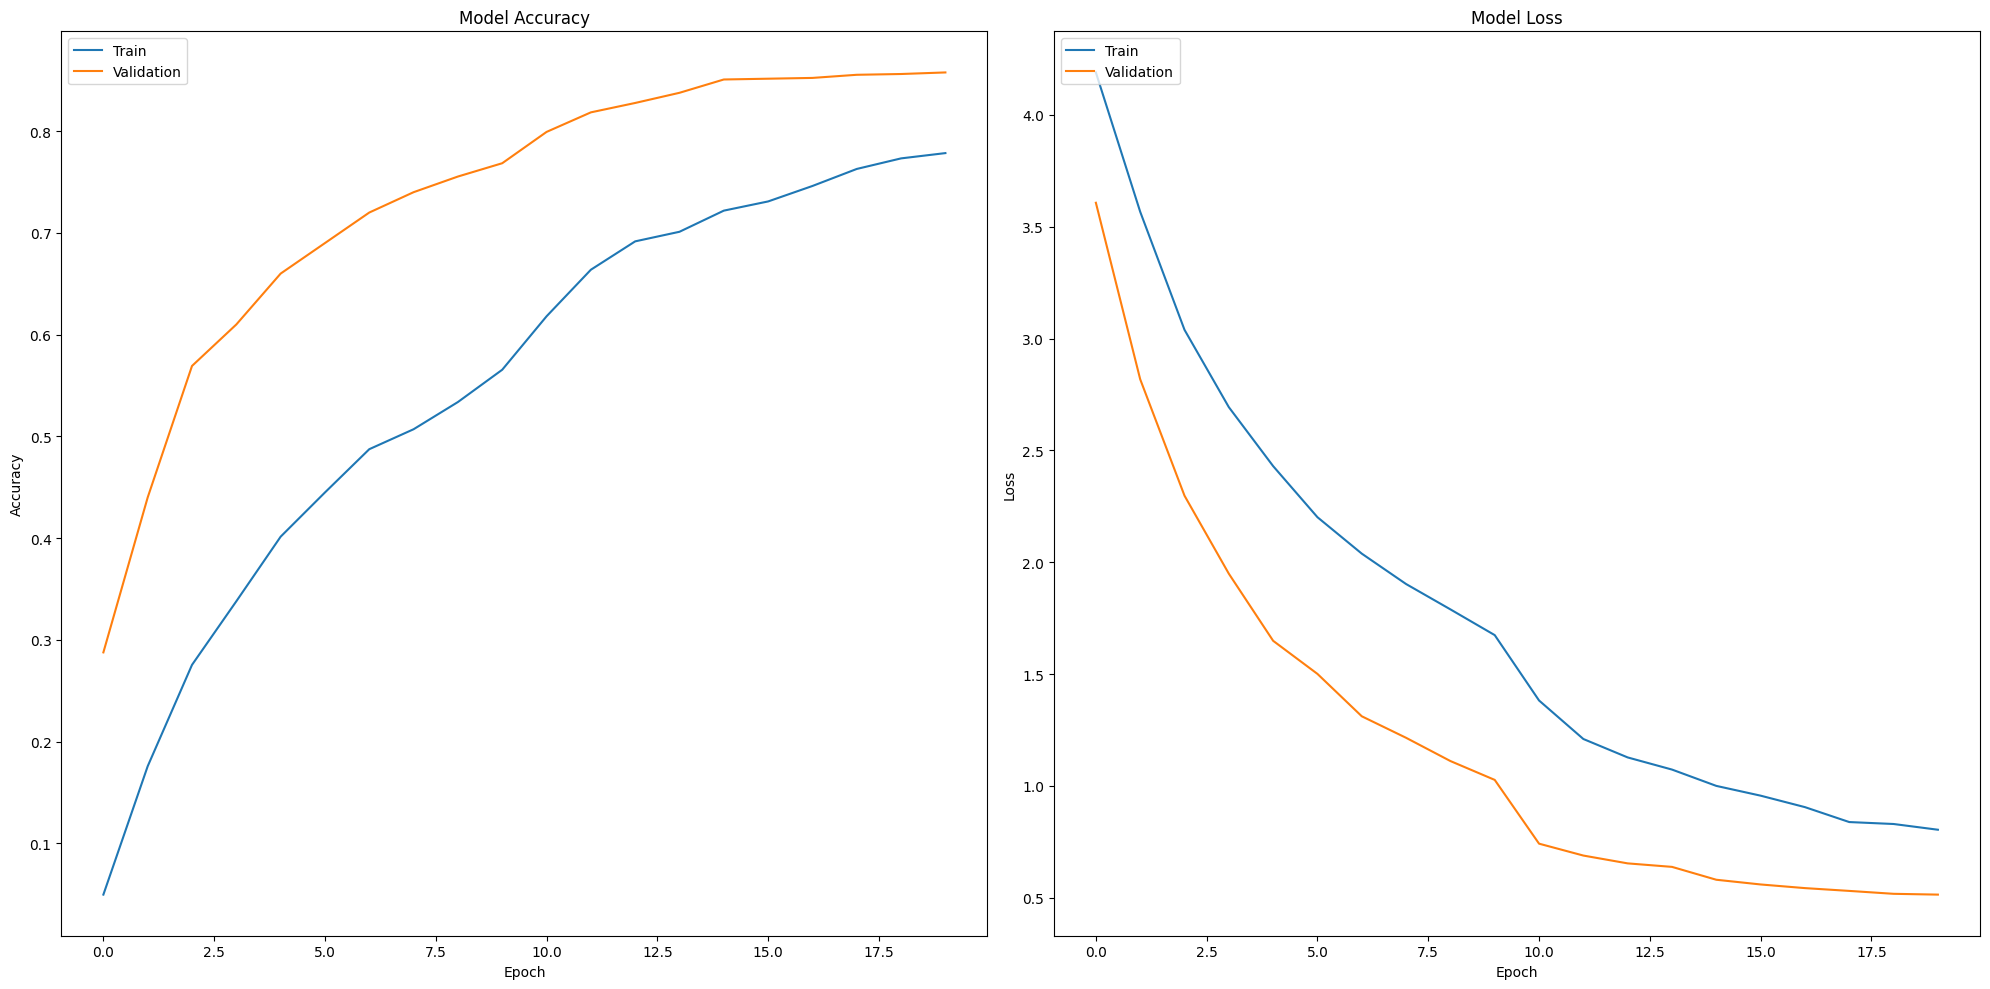

In [12]:
# Data augmentation para entrenamiento y solo rescale para validación

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Cargar los datos de entrenamiento usando flow_from_dataframe

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Imprime el mapeo de clases: nombre de clase → índice para realizar la web

print("Mapping de clases (nombre: índice):", train_generator.class_indices)

# Crea un diccionario inverso: índice → nombre de clase índice para realizar la web

indice_a_clase = {v: k for k, v in train_generator.class_indices.items()}
print("Mapping de índices (índice: nombre):", indice_a_clase)

# Cargar los datos de validación

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Cargar el modelo VGG16 preentrenado (sin las capas superiores)

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Congela el modelo base para la primera fase de entrenamiento

base_model.trainable = False

# Crear el modelo agregando capas FC personalizadas

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(75, activation='softmax')  # Capa de salida (Número de clases)
])

# Compilar el modelo

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Definir pesos de clase para manejar desbalance (ajusta si es necesario)

class_weights = {i: 1.0 for i in range(75)}

# Callbacks

lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

# Entrenar el modelo (Fase 1: Modelo base congelado)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Fine-Tuning: Descongela las últimas 5 capas de VGG16

base_model.trainable = True
for layer in base_model.layers[:-5]:
    layer.trainable = False

# Recompilar para fine-tuning con una tasa de aprendizaje más baja

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-Tuning del modelo

history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Preparar los datos de test (sin etiquetas)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=image_dir,
    x_col='filename',
    y_col=None,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# Realizar las predicciones sobre los datos de test
predictions = model.predict(test_generator)

# Convertir las probabilidades del softmax al índice de clase
predicted_classes = np.argmax(predictions, axis=1)

# Crear DataFrame con nombres de archivo y el índice de la clase predicha
df_test['predicted_label'] = predicted_classes

# (Opcional) Mapear el índice a nombre de clase usando el diccionario inverso
df_test['predicted_label_name'] = df_test['predicted_label'].map(indice_a_clase)

# Guardar las predicciones en un CSV
df_test[['filename', 'predicted_label', 'predicted_label_name']].to_csv("test_predictions.csv", index=False)

print("Predictions saved to test_predictions.csv")

# Graficar la precisión y la pérdida
plt.figure(figsize=(20, 10))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_finetune.history['loss'])
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [13]:
model.save('/content/drive/MyDrive/dataset_Mariposa/modelo_VGG16_3.keras')